In [15]:
import nltk
from nltk.book import *
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)
data = pd.read_json('/Users/maida/Desktop/preprocessedData.json')
data.head()

,source,text,created_at,retweet_count,id_str,tokens
0,Twitter for iPhone,"[White, House, news, conference, at, PM, Easte...",2020-03-30 20:50:35,14441,1244728753617620992,"[white, hous, news, confer, PM, eastern, thank..."
1,Twitter for iPhone,[],2020-03-30 17:46:15,15520,1244682364284014592,[]
2,Twitter for iPhone,"[On, NationalDoctorsDay, we, recognize, the, r...",2020-03-30 17:11:59,19753,1244673740866191360,"[nationaldoctorsday, recogn, remark, men, amp,..."
3,Twitter for iPhone,[],2020-03-30 17:05:33,39114,1244672122414338048,[]
4,Twitter for iPhone,"[Nancy, Pelosi, and, the, Democrats, delayed, ...",2020-03-30 11:17:10,43360,1244584449309892608,"[nanci, pelosi, democrat, delay, worker, helps..."


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

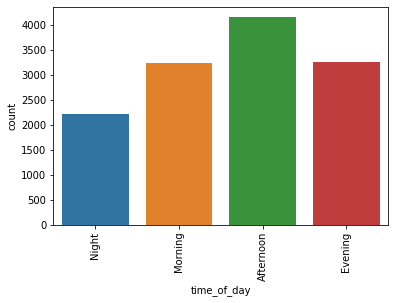

In [18]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['day_of_week'] = data['created_at'].dt.day_name()
a = data.assign(tweet_session=pd.cut(data.created_at.dt.hour,[0,6,12,18,24], labels = ['Night', 'Morning', 'Afternoon', 'Evening']))
data['time_of_day'] = a['tweet_session']

sns.countplot(x='time_of_day', data=data)
plt.xticks(rotation=90)
#data.head()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

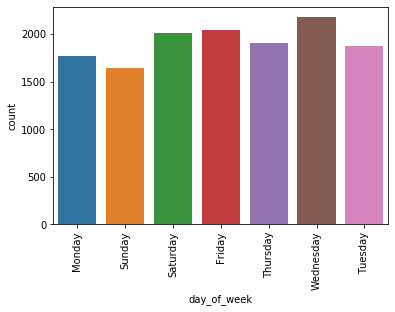

In [19]:
sns.countplot(x='day_of_week', data=data)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

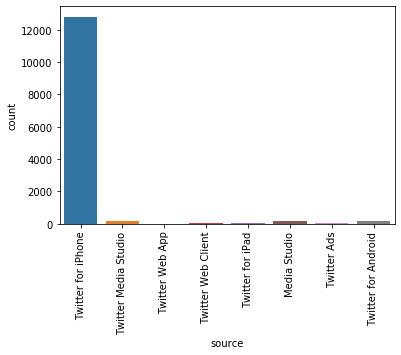

In [21]:
sns.countplot(x='source', data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

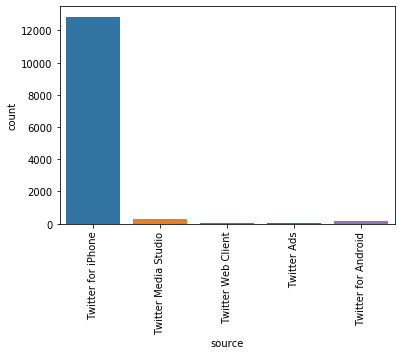

In [32]:
data['source'] = np.where(data['source']=='Media Studio', 'Twitter Media Studio', data['source'])
data['source'] = np.where(data['source']=='Twitter Web App', 'Twitter Web Client', data['source'])
data['source'] = np.where(data['source']=='Twitter for iPad', 'Twitter for iPhone', data['source'])

sns.countplot(x='source', data=data)
plt.xticks(rotation=90)

In [28]:
#not final, still working on this
count = 0
for x in data['tokens']:
    data['nr_of_words'] = count
    for token in x:
        count +=1
        
    
data.head() 
        

,source,text,created_at,retweet_count,id_str,tokens,day_of_week,time_of_day,nr_of_words
0,Twitter for iPhone,"[White, House, news, conference, at, PM, Easte...",2020-03-30 20:50:35,14441,1244728753617620992,"[white, hous, news, confer, PM, eastern, thank...",Monday,Evening,354701
1,Twitter for iPhone,[],2020-03-30 17:46:15,15520,1244682364284014592,[],Monday,Afternoon,354701
2,Twitter for iPhone,"[On, NationalDoctorsDay, we, recognize, the, r...",2020-03-30 17:11:59,19753,1244673740866191360,"[nationaldoctorsday, recogn, remark, men, amp,...",Monday,Afternoon,354701
3,Twitter for iPhone,[],2020-03-30 17:05:33,39114,1244672122414338048,[],Monday,Afternoon,354701
4,Twitter for iPhone,"[Nancy, Pelosi, and, the, Democrats, delayed, ...",2020-03-30 11:17:10,43360,1244584449309892608,"[nanci, pelosi, democrat, delay, worker, helps...",Monday,Morning,354701
